In [1]:
import os
print(os.listdir("images"))

from os import walk
for (dirpath, dirnames, filenames) in walk("assignment-5/images"):
    print("Directory path: ", dirpath)
    print("Folder name: ", dirnames)

['apple', '.DS_Store', 'guava']


In [2]:
import matplotlib.pyplot as plt
import torch
from torchvision import datasets, transforms

transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize the image to 256x256 pixels
    transforms.ToTensor(),  # Convert the image to a PyTorch tensor
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),  # Normalize the image
])
import numpy as np
from torch.utils.data.sampler import SubsetRandomSampler

dataset = datasets.ImageFolder("images", transform=transform)
batch_size = 32
test_split = .2
shuffle_dataset = True
random_seed= 42

# Creating data indices for training and test splits:
dataset_size = len(dataset)
indices = list(range(dataset_size))
split = int(np.floor(test_split * dataset_size))

if shuffle_dataset:
    np.random.seed(random_seed)
    np.random.shuffle(indices)

train_indices, test_indices = indices[split:], indices[:split]
train_sampler = SubsetRandomSampler(train_indices)
test_sampler = SubsetRandomSampler(test_indices)

train_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size,sampler=train_sampler)
test_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size,sampler=test_sampler)

In [3]:
import torch                    # PyTorch library
import torch.nn as nn           # Contains the neural network modules
import torch.optim as optim     # Contains the optimizers, stochastic gradient descent, Adam, etc. 
import torch.nn.functional as F # relu, tanh, etc.
from torch.utils.data import DataLoader # Dataloader for the dataset manipulation
import torchvision.datasets as datasets # Datasets
import torchvision.transforms as transforms 
import torchvision.models as torchmodels

In [4]:
# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

class Indentity(torch.nn.Module):
    def __init__(self):
        super(Indentity, self).__init__()
    def forward(self, x):
        return x

model = torchmodels.vgg16(pretrained=True)
# print(model)

/opt/homebrew/anaconda3/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [5]:
for param in model.parameters():
    param.requires_grad = False

model.classifier[6] = nn.Linear(4096, 2)
# print(model)

In [6]:
x = torch.randn(1, 3, 224, 224)
print(model(x).shape)

torch.Size([1, 2])


In [7]:
# Hyperparameters
from tqdm import tqdm 

in_channel = 3
num_classes = 2
learning_rate = 0.001
batch_size = 16
num_epochs = 5

# train_dataset = datasets.ImageFolder("images", transform=transform)
# train_loader = torch.utils.data.DataLoader(dataset, batch_size=32, shuffle=True)

criterion = nn.CrossEntropyLoss()
optimiser = optim.Adam(model.parameters(), lr = learning_rate)

# Training the Network
for epochs in range(num_epochs):
    for batch_idx, (data, target) in enumerate(tqdm(train_loader)):
        data = data.to(device = device)
        target = target.to(device = device)
        # data shape is 64,1,28,28

        # Get data to flatten
        # data = data.reshape(data.shape[0], -1) # We don't need to reshape the data

        # Feed Forward
        score = model(data)
        loss = criterion(score, target)

        # Backprop
        optimiser.zero_grad()
        loss.backward()

        # Gradient Descent
        optimiser.step()

# Check accuracy on training and test to see how good our model
def check_accuracy(loader, model):
    num_correct = 0
    num_samples = 0
    model.eval() # We set the model to evaluation mode

    with torch.no_grad(): # We don't need to calculate the gradients
        # print("Checking accuracy on data")
        for x, y in loader:
            x = x.to(device = device)
            y = y.to(device = device)
            # x = x.reshape(x.shape[0], -1) # We don't need to reshape the data

            scores = model(x)
            _, predictions = scores.max(1) # We get the index of the maximum value
            num_correct += (predictions == y).sum()
            num_samples += predictions.size(0)
    print(f"Got {num_correct} / {num_samples} with accuracy {float(num_correct)/float(num_samples)*100:.2f}")

    model.train() # We can check the accuracy while training also, use it then
    return float(num_correct)/float(num_samples)*100

print("Checking accuracy on train data")
check_accuracy(train_loader, model)
print("Checking accuracy on test data")
check_accuracy(test_loader, model)

100%|██████████| 5/5 [00:18<00:00,  3.72s/it]


Checking accuracy on train data
Got 157 / 160 with accuracy 98.12
Checking accuracy on test data
Got 37 / 40 with accuracy 92.50


92.5

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(0)
Apple


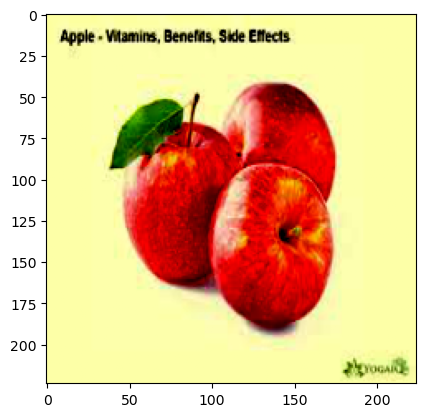

In [15]:
images, labels = next(iter(test_loader))
# helper.imshow(images[0], normalize=False)
plt.imshow(images[0].permute(1,2,0) )#, normalize=False)

# printing the label of the image
print(labels[0]) # 0 for apple, 1 for banana

if model(images[0].unsqueeze(0).to(device)).argmax() == 0:
    print("Apple")
else:
    print("Gauva")

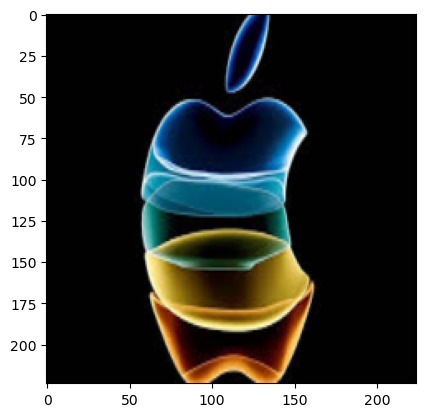

Apple


In [28]:
# Trying FUN images:-
from PIL import Image
trial_image = Image.open('fun_images/apple5.jpg')

transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize the image to 256x256 pixels
    transforms.ToTensor()#,  # Convert the image to a PyTorch tensor
    #transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),  # Normalize the image
])

transformed_image = transform(trial_image)
# convert_tensor = transforms.ToTensor()
# transformed_image = convert_tensor(trial_image)
# transformed_image = transform(trial_image)

# print(type(transformed_image))

plt.imshow(transformed_image.permute(1, 2, 0))
plt.show()

if model(transformed_image.unsqueeze(0).to(device)).argmax() == 0:
    print("Apple")
else:
    print("Gauva")
